In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')

train.shape, test.shape

((1460, 80), (1459, 79))

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Concat the train and test
df = pd.concat((train,test))
df.shape

(2919, 80)

# Exploratory Data Analysis

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [7]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
df.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

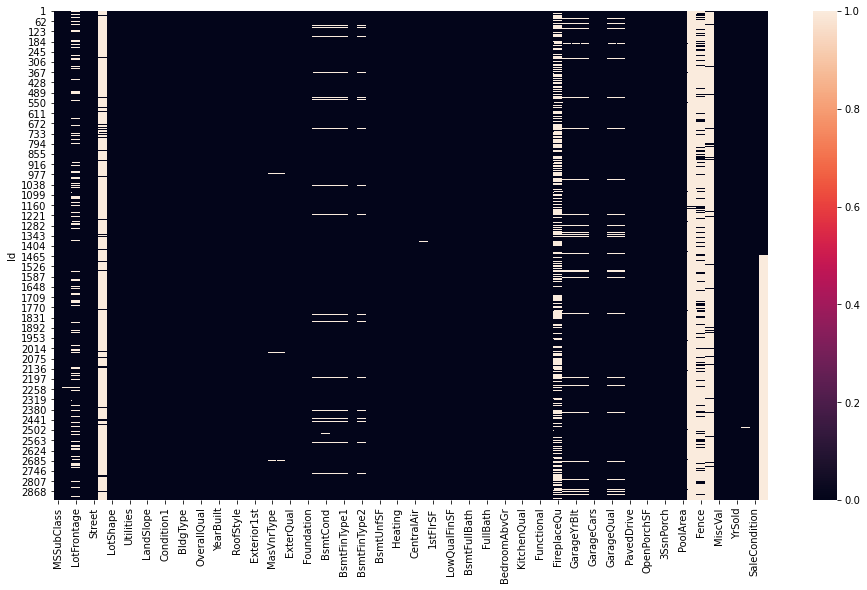

In [10]:
#Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

These white cells are showing the null values

In [11]:
# Get the percentages of null value
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

In [12]:
col_for_drop = null_percent[null_percent > 20].keys() # if the null value % 20 or > 20 so need to drop it
# drop columns
df = df.drop(col_for_drop, "columns")
df.shape

(2919, 74)

In [13]:
# find the unique value count
for i in df.columns:
    print(i + "\t" + str(len(df[i].unique())))

MSSubClass	16
MSZoning	6
LotFrontage	129
LotArea	1951
Street	2
LotShape	4
LandContour	4
Utilities	3
LotConfig	5
LandSlope	3
Neighborhood	25
Condition1	9
Condition2	8
BldgType	5
HouseStyle	8
OverallQual	10
OverallCond	9
YearBuilt	118
YearRemodAdd	61
RoofStyle	6
RoofMatl	8
Exterior1st	16
Exterior2nd	17
MasVnrType	5
MasVnrArea	445
ExterQual	4
ExterCond	5
Foundation	6
BsmtQual	5
BsmtCond	5
BsmtExposure	5
BsmtFinType1	7
BsmtFinSF1	992
BsmtFinType2	7
BsmtFinSF2	273
BsmtUnfSF	1136
TotalBsmtSF	1059
Heating	6
HeatingQC	5
CentralAir	2
Electrical	6
1stFlrSF	1083
2ndFlrSF	635
LowQualFinSF	36
GrLivArea	1292
BsmtFullBath	5
BsmtHalfBath	4
FullBath	5
HalfBath	3
BedroomAbvGr	8
KitchenAbvGr	4
KitchenQual	5
TotRmsAbvGrd	14
Functional	8
Fireplaces	5
GarageType	7
GarageYrBlt	104
GarageFinish	4
GarageCars	7
GarageArea	604
GarageQual	6
GarageCond	6
PavedDrive	3
WoodDeckSF	379
OpenPorchSF	252
EnclosedPorch	183
3SsnPorch	31
ScreenPorch	121
PoolArea	14
MiscVal	38
MoSold	12
YrSold	5
SaleType	10
SaleCondition	6


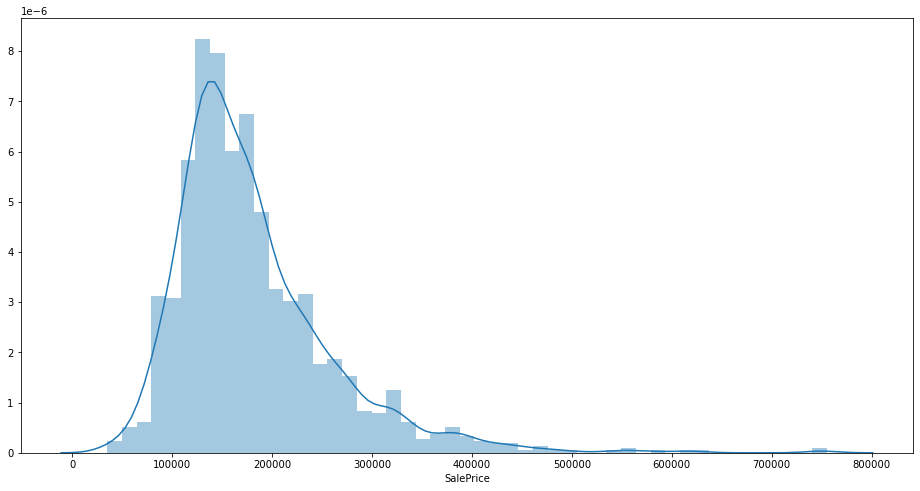

In [14]:
# Plot the distplot of target
fig, ax = plt.subplots(figsize = (16, 8))
bar = sns.distplot(train["SalePrice"])
#sns.histplot(data=train, x = "SalePrice", kde = True)
plt.show()

The distribution seems to be right-skewed. Next, the skewness and kurtosis are examined to confirm this finding.

In [15]:
print(f"Skewness: {round(train['SalePrice'].skew(), 1)}")
print(f"Kurtosis: {round(train['SalePrice'].kurt(), 1)}")

Skewness: 1.9
Kurtosis: 6.5


(37.5, -0.5)

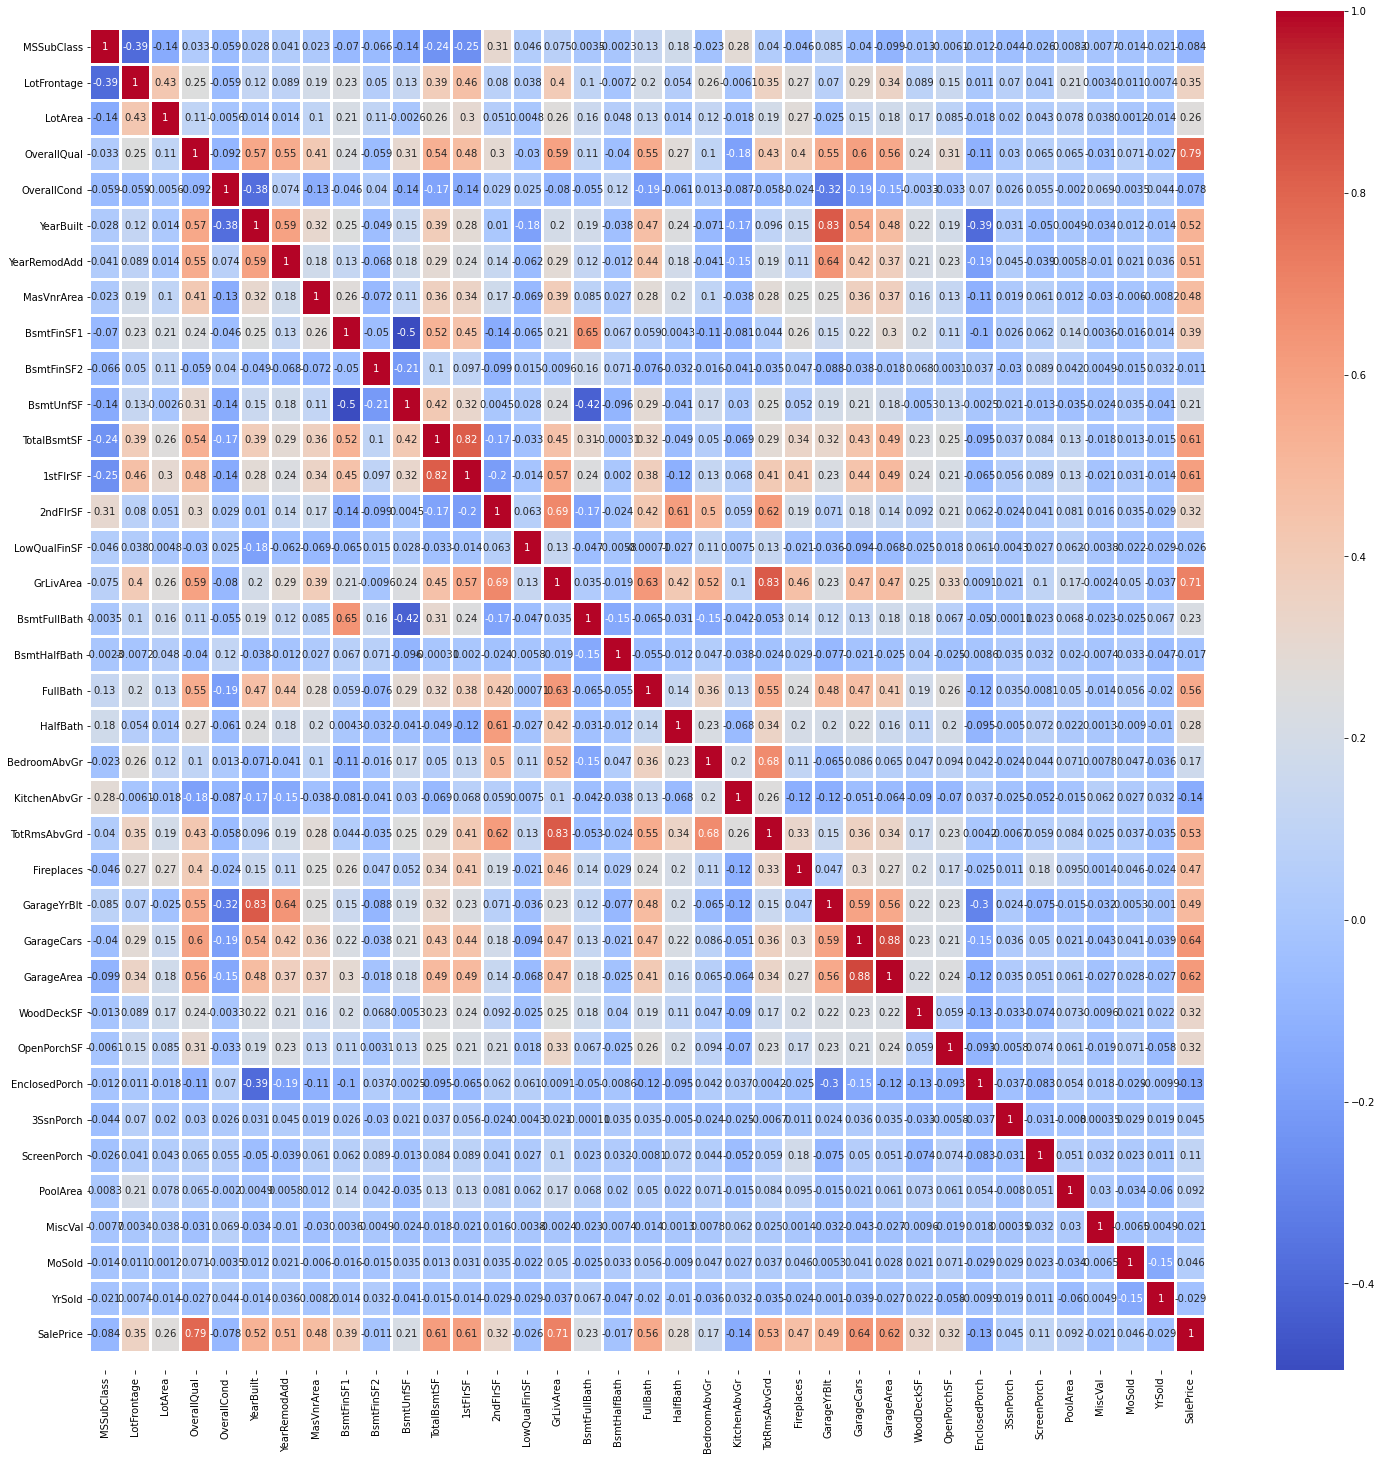

In [16]:
# correlation heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(train.corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')


(19.5, -0.5)

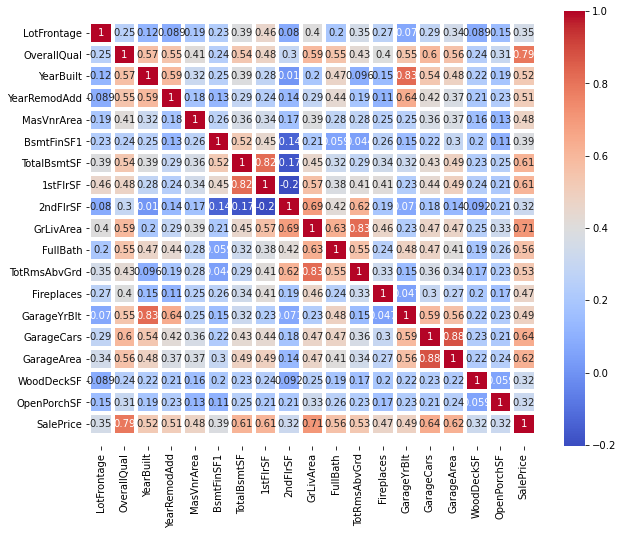

In [17]:
# correlation heatmap of higly correlated features with SalePrice
hig_corr = train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.3]
print(hig_corr_features)

plt.figure(figsize=(10,8))
ax = sns.heatmap(train[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [18]:
corr_df = pd.DataFrame(train.corr()["SalePrice"].sort_values(ascending = False))
corr_df

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


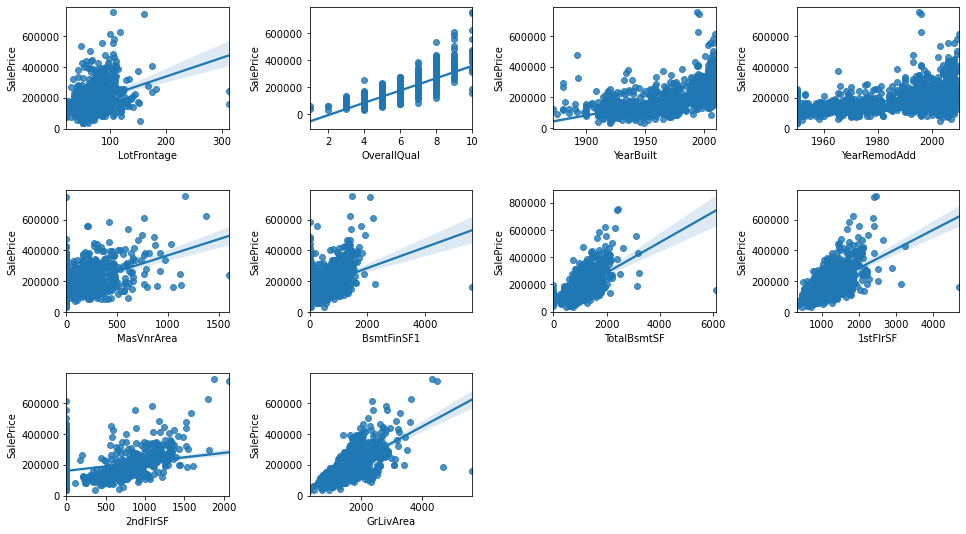

In [19]:
# Plot regplot to get the nature of highly correlated data
plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=train, x = hig_corr_features[i], y = 'SalePrice')

# Handling missing values

In [20]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 74, dtype: int64

In [21]:
df['LotFrontage'].fillna(np.mean(df['LotFrontage']), inplace=True)

In [22]:
def fill_null(values):
    type = values[0]
    area = values[1]
    if pd.isnull(type):
        return "None",0
    else:
        return values

df[['MasVnrType','MasVnrArea']] = df[['MasVnrType','MasVnrArea']].apply(fill_null, axis=1)

In [23]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [24]:
df['GarageType'].fillna('No',inplace=True) # fill no that doens't have any garage type
df['GarageYrBlt'].fillna(0,inplace=True) # fill 0 that doesn't have any garage yr build because they don't have any garage
df['GarageFinish'].fillna('No',inplace=True)
df['GarageQual'].fillna('No',inplace=True) 
# GarageCond is similar to GarageQual so no point in storing the same columns, we will drop it later.df
# Exterior2nd is similar to Exterior1st we will also drop it later

In [25]:
df.drop('GarageCond', axis=1, inplace=True)
df.drop('Exterior2nd', axis=1, inplace=True)

In [26]:
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace=True)
df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace=True)
df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean(), inplace=True)
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(), inplace=True)
df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean(), inplace=True)
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(), inplace=True)
df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0], inplace=True)
df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0], inplace=True)
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)
df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)
df['GarageCars'].fillna(df['GarageCars'].mode()[0], inplace=True)
df['GarageArea'].fillna(df['GarageArea'].mean(), inplace=True)
df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)

In [27]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 72, dtype: int64

In [28]:
#Convert object columns to numerical columns
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [29]:
for i in object_columns:
    df = pd.get_dummies(df, columns=[i])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 252 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(25), uint8(216)
memory usage: 1.4 MB


scaling dataset with robust scaler as we know that there might be some outliers within the dataset.

In [31]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

# Machine Learning model building

In [32]:
train_len = len(train)

In [33]:
X_train = df[:train_len]
X_test = df[train_len:]
y_train = train.SalePrice

X_train.shape, X_test.shape, y_train.shape

((1460, 252), (1459, 252), (1460,))

# Cross Validation

In [34]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45) # Split your data to k Folds
    r2 = make_scorer(r2_score) # r2_score is the R^2 (coefficient of determination) which used to evaluate the performance of linear Regression Model
    # formula is R^2 = 1-SS(res)/SS(tot)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score
    score = [r2_val_score.mean()]
    return score

In [35]:
#Linear Regression
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[-232805965122.47232]

In [36]:
#L2, Ridge Regression
rdg = linear_model.Ridge()
test_model(rdg)

[0.8145344927274687]

In [37]:
#L1, Lasso Regression
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

C:\Users\Keval\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182867255924.98538, tolerance: 626433674.8038659
  model = cd_fast.enet_coordinate_descent(
C:\Users\Keval\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167160382685.29416, tolerance: 597202614.5491408
  model = cd_fast.enet_coordinate_descent(
C:\Users\Keval\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202392058624.92355, tolerance: 617759396.8462735
  model = cd_fast.enet_coordinate_descent(


[0.800263850749976]

In [38]:
#Support Vector Regression
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
test_model(svr_reg)

[-0.05215614687339524]

We got so low accuracy let's hyperparameter tuned this model.

In [39]:
from sklearn.model_selection import RandomizedSearchCV 
params = {'kernel': ['linear', 'rbf', 'sigmoid'],
          'epsilon': [0.01, 0.001],
          'C': [0.001, 0.01, 0.1, 1, 10, 100,1000], 
          'gamma': [0.001, 0.01]}

rand_search = RandomizedSearchCV(svr_reg, param_distributions=params, n_jobs=-1, cv=11) 
rand_search.fit(X_train, y_train) 
rand_search.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'epsilon': 0.001, 'C': 1000}

In [40]:
svr_reg= SVR(kernel='linear', C=1000, epsilon=0.001, gamma=0.01)
test_model(svr_reg)

[0.8462875747342565]

Still we didn't get much better accuracy

In [41]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[0.6358115374895548]

In [42]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[0.8347263861090876]

In [43]:
#Bagging and Boosting
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)

In [44]:
test_model(br_reg)

[0.8357443376111826]

In [45]:
test_model(gbr_reg)

[0.8531891677260842]

In [46]:
# XGBoost
import xgboost
xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[0.8278681466478979]

We got better accuracy with gradient boosting regression till now, let's submit this prediction with this as of now.

# Submitting Prediction

In [47]:
gbr_reg.fit(X_train, y_train)
y_pred = gbr_reg.predict(X_test).round(2)
y_pred

array([126170.9 , 166208.32, 184639.44, ..., 147749.35, 116685.22,
       218154.43])

In [48]:
ID = pd.Series(test.index)
ID

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [49]:
submit_result = pd.concat([ID, pd.DataFrame(y_pred)], axis=1)
submit_result.columns=['Id', 'SalePrice']
submit_result

,Id,SalePrice
0,1461,126170.90
1,1462,166208.32
2,1463,184639.44
3,1464,188626.77
4,1465,184604.27
...,...,...
1454,2915,77631.54
1455,2916,75618.78
1456,2917,147749.35
1457,2918,116685.22


In [50]:
submit_result.to_csv('submission.csv', index=False)
submit_result

,Id,SalePrice
0,1461,126170.90
1,1462,166208.32
2,1463,184639.44
3,1464,188626.77
4,1465,184604.27
...,...,...
1454,2915,77631.54
1455,2916,75618.78
1456,2917,147749.35
1457,2918,116685.22
